# Efecto Hall en p-Germanium

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from tabulate import tabulate
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set_theme(style="darkgrid")

# Data
DATA_PATH = "data/"

# Figures
FIGURES_PATH = "figures/"

# Funciones
rnd2 = lambda x: round(x, 2)

    Ip/mA |    UH/mV
----------+----------
 -32.8724 | -56.8852
 -24.6841 | -42.6979
 -20.0026 | -34.7501
 -14.6913 | -26.0029
 -10.0609 | -18.0285
  -5.3113 |  -9.9547
  -0.4937 |  -1.7315
   4.8177 |   7.1716
   9.7715 |  15.4213
  14.7934 |  23.8766
  20.3942 |  33.7915
  24.5819 |  40.9034
  31.0679 |  51.7006
 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.248e+05
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           1.67e-27
Time:                        20:27:05   Log-Likelihood:                 7.4727
No. Observations:                  13   AIC:                            -10.95
Df Residuals:                      11   BIC:                            -9.815
Df Model:                           1             

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


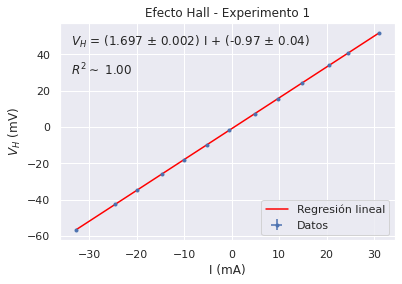

In [2]:
# Experimento 1
B = 250 # mT
errorB = 1 # mT
errorV = .1 # mV
errorI = .1 # mA
d = 1 # mm
q = 1.602 * (10**(-19)) # culombio

data_e1 = DATA_PATH + "experimento1_hall.csv"
df_e1 = pd.read_csv(data_e1)

print(tabulate(
    df_e1, 
    headers="keys", 
    tablefmt="presto", 
    showindex=False)
)
print(" ")

y = df_e1["UH/mV"].to_numpy()
x = df_e1["Ip/mA"].to_numpy()
X = sm.add_constant(x, prepend=True) # Our model needs an intercept so we add a column of 1s

ols1 = sm.OLS(y, X)
ols_result1 = ols1.fit()
print(ols_result1.summary())
print(" ")

y_pred = ols_result1.predict(X)
print("Coeficiente: %.3f" % ols_result1.params[1])
print("Término independiente: %.3f" % ols_result1.params[0])
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y, y_pred))
print("R2: %.2f" % ols_result1.rsquared)
print(" ")

alpha = ols_result1.params[1]
errorAlpha = ols_result1.bse[1]

Rh = alpha * d / B
errorRh = abs(d * errorAlpha / B) + abs(-alpha * d * errorB / (B**2))
n = B / (q * d * alpha)
errorN = (1 / (q * d * alpha)) * (abs(errorB) + (abs(B * errorAlpha / alpha)))
print("Coeficiente Hall (Rh): ", Rh)
print("Error coeficiente Hall: ", errorRh)
print("Densidad de portadores (portadores/m): ", n)
print("Error densidad de portadores: ", errorN)
Rh = 1 / (n*q)
print("Coeficiente Hall (Rh): ", Rh)

plt.errorbar(x, y, xerr=errorI, yerr=errorV, fmt=".", label="Datos")
plt.plot(x, y_pred, color="red", label="Regresión lineal")
plt.title("Efecto Hall - Experimento 1")
plt.xlabel("I (mA)")
plt.ylabel("$V_H$ (mV)")
plt.figtext(.15, .8, f"$V_H$ = (%.3f $\pm$ %.3f) I + (%.2f $\pm$ %.2f)" % (ols_result1.params[1], ols_result1.bse[1], ols_result1.params[0], ols_result1.bse[0]))
plt.figtext(.15, .7, f"$R^2 \sim$ %.2f" % ols_result1.rsquared)
plt.grid(True)
plt.legend(loc="lower right")
plt.savefig(FIGURES_PATH + "experimento1.png")
plt.show()

      B/mT |    UH/mV
-----------+----------
 -305.56   | -60.3649
 -281.49   | -56.2052
 -262.376  | -52.7853
 -241.315  | -48.9341
 -220.431  | -45.0066
 -200.256  | -41.1754
 -178.664  | -36.9825
 -160.257  | -33.2077
 -141.674  | -29.4825
 -121.675  | -25.3162
 -101.055  | -21.0471
  -79.4456 | -16.4927
  -64.0304 | -13.1723
  -40.0847 |  -7.9843
  -23.5723 |  -4.4184
  -13.5551 |  -2.2357
   20.4786 |   5.1581
   40.1591 |   9.4073
   62.0695 |  14.0745
   81.1128 |  18.1413
  100.103  |  22.1517
  120.967  |  26.4175
  141.143  |  30.5473
  160.081  |  34.4051
  180.079  |  38.2497
  199.548  |  41.9648
  220.608  |  45.8724
  241.846  |  49.7435
  259.899  |  52.971
  280.606  |  56.7492
  303.082  |  60.4777
 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squar

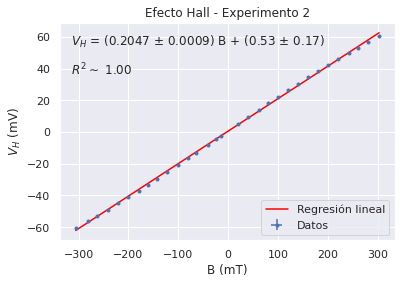

In [3]:
# Experimento 2
I = 30 # mA
errorB = 1 # mT
errorV = .1 # mV
d = 1 # mm
q = 1.602 * (10**(-19)) # culombio

data_e2 = DATA_PATH + "experimento2_hall.csv"
df_e2 = pd.read_csv(data_e2)

print(tabulate(
    df_e2, 
    headers="keys", 
    tablefmt="presto", 
    showindex=False)
)
print(" ")

y = df_e2["UH/mV"].to_numpy()
x = df_e2["B/mT"].to_numpy()
X = sm.add_constant(x, prepend=True) # Our model needs an intercept so we add a column of 1s

ols2 = sm.OLS(y, X)
ols_result2 = ols2.fit()
print(ols_result2.summary())
print(" ")

y_pred = ols_result2.predict(X)
print("Coeficiente: %.3f" % ols_result2.params[1])
print("Término independiente: %.3f" % ols_result2.params[0])
print("Mean Squared Error (MSE): %.2f" % mean_squared_error(y, y_pred))
print("R2: %.2f" % ols_result2.rsquared)
print(" ")

beta = ols_result2.params[1]
errorBeta = ols_result2.bse[1]

Rh = beta * d / I #Rh = 1 / (n*q)
errorRh = abs(d * errorBeta / I) + abs(-beta * d * errorI / (I**2))
n = I / (q * d * beta)
errorN = (1 / (q * d * beta)) * (abs(errorI) + (abs(I * errorBeta / beta)))
print("Coeficiente Hall (Rh): ", Rh)
print("Error coeficiente Hall: ", errorRh)
print("Densidad de portadores (portadores/m): ", n)
print("Error densidad de portadores: ", errorN)
print(" ")

plt.errorbar(x, y, xerr=errorB, yerr=errorV, fmt=".", label="Datos")
plt.plot(x, y_pred, color="red", label="Regresión lineal")
plt.title("Efecto Hall - Experimento 2")
plt.xlabel("B (mT)")
plt.ylabel("$V_H$ (mV)")
plt.figtext(.15, .8, f"$V_H$ = (%.4f $\pm$ %.4f) B + (%.2f $\pm$ %.2f)" % (ols_result2.params[1], ols_result2.bse[1], ols_result2.params[0], ols_result2.bse[0]))
plt.figtext(.15, .7, f"$R^2 \sim$ %.2f" % ols_result2.rsquared)
plt.grid(True)
plt.legend(loc="lower right")
plt.savefig(FIGURES_PATH + "experimento2.png")
plt.show()

    B/mT |   Up/V |     Rm-R0/R0
---------+--------+--------------
   0.493 |  1.548 |  0
  19.799 |  1.547 | -0.000645995
  40.187 |  1.549 |  0.000645995
  59.514 |  1.549 |  0.000645995
  79.725 |  1.553 |  0.00322997
 100.574 |  1.555 |  0.00452196
 120.702 |  1.557 |  0.00581395
 139.816 |  1.559 |  0.00710594
 159.638 |  1.56  |  0.00775194
 179.814 |  1.568 |  0.0129199
 199.813 |  1.569 |  0.0135659
 220.343 |  1.574 |  0.0167959
 240.519 |  1.574 |  0.0167959
 260.695 |  1.58  |  0.0206718
 280.34  |  1.584 |  0.0232558
 300.693 |  1.589 |  0.0264858
 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.903e+04
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           2.27e-48
Time:                        20:27:06

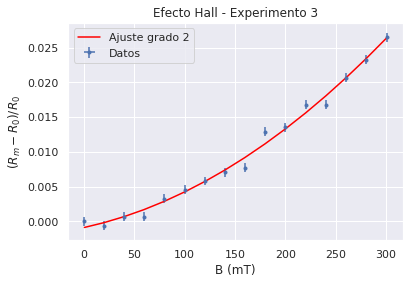

In [4]:
# Experimento 3
I = 30 # mA
errorVmuestra = 1 # mV
errorI = .1 # mA
l = 2 # cm
A = 1 * (10 ** (-5)) # m2

data_e3 = DATA_PATH + "experimento3_hall.csv"
df_e3 = pd.read_csv(data_e3)
df_e3["Rm-R0/R0"] = (df_e3["Up/V"] - df_e3["Up/V"][0]) / df_e3["Up/V"][0]

print(tabulate(
    df_e3, 
    headers="keys", 
    tablefmt="presto", 
    showindex=False)
)
print(" ")

y = df_e3["Rm-R0/R0"].to_numpy()
x = df_e3["B/mT"].to_numpy()

# Continuación experimento2 para Ro
ols3 = sm.OLS(y, sm.add_constant(x, prepend=True))
ols_result3 = ols2.fit()
print(ols_result3.summary())
print(" ")

Ro = df_e3["Up/V"][0] / (I/1000) #ols_result3.params[0] # Resistencia temperatura ambiente (cuando B=0). se puede sacar con exp5
errorRo = ((errorVmuestra/1000) / (I/1000)) + abs(df_e3["Up/V"][0]*(errorI/1000)/((I/1000)**2))
conductividad = (l/100) / (Ro * A)
errorConductividad = abs(-(l/100)*errorRo / (A*(Ro**2)))
movilidad = Rh*conductividad
errorMovilidad = conductividad*errorRh + Rh*errorConductividad
print("Resistencia temperatura ambiente: ", Ro)
print("Error resistencia Tamb: ", errorRo)
print("Conductividad Tamb: ", conductividad)
print("Error conductividad Tamb: ", errorConductividad)
print("Movilidad Tamb: ", movilidad)
print("Error movilidad Tamb: ", errorMovilidad)
print(" ")

# Ajuste grado 2
deg = 2
coef, residuals, rank, singular_values, rcond = np.polyfit(
    x, 
    y, 
    deg=deg, 
    rcond=None, 
    full=True, 
    w=None, 
    cov=False
) # full=True para calcular valores secundarios (residuos, etc)
y_pred = np.polyval(coef, x) # coef[0] coeficiente de mayor grado

errorR = (errorVmuestra/1000) / df_e3["Up/V"][0] # errorVmuestra en mV, se pasan a V
print(f"Ajuste grado {deg}")
print ("Residuo del ajuste: ", residuals)
print("Coeficientes de ajuste: ", coef)

plt.errorbar(x, y, xerr=errorB, yerr=errorR, fmt=".", label="Datos")
plt.plot(x, y_pred, color="red", label=f"Ajuste grado {deg}")
plt.title("Efecto Hall - Experimento 3")
plt.xlabel("B (mT)")
plt.ylabel("$(R_m - R_0)/R_0}$")
plt.grid(True)
plt.legend()
plt.savefig(FIGURES_PATH + "experimento3.png")
plt.show()

   Tp/gC |   UH/mV
---------+---------
  25.142 |  60.076
  25.159 |  60.1
  25.176 |  60.166
  25.261 |  60.076
  25.329 |  60.066
 


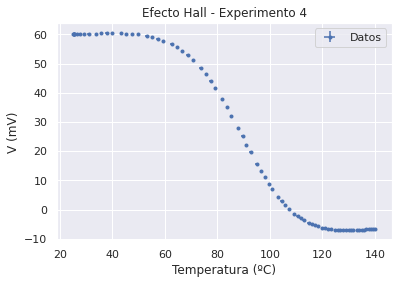

In [5]:
# Experimento 4
errorT = .5 # gC

data_e4 = DATA_PATH + "experimento4_hall.csv"
df_e4 = pd.read_csv(data_e4)

print(tabulate(
    df_e4.head(), 
    headers="keys", 
    tablefmt="presto", 
    showindex=False)
)
print(" ")

y = df_e4["UH/mV"].to_numpy()
x = df_e4["Tp/gC"].to_numpy()

plt.errorbar(x, y, xerr=errorT, yerr=errorV, fmt=".", label="Datos")
plt.title("Efecto Hall - Experimento 4")
plt.xlabel("Temperatura (ºC)")
plt.ylabel("V (mV)")
plt.grid(True)
plt.legend()
plt.savefig(FIGURES_PATH + "experimento4.png")
plt.show()

   Tp/gC |   Up/V
---------+--------
  26.734 |  1.547
  26.743 |  1.549
  26.785 |  1.548
  27.084 |  1.547
  27.833 |  1.551
 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.458e+04
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           1.30e-47
Time:                        20:27:07   Log-Likelihood:                 110.50
No. Observations:                  30   AIC:                            -217.0
Df Residuals:                      28   BIC:                            -214.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

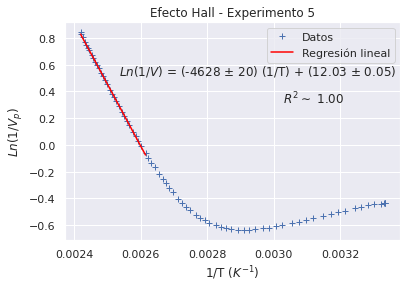

In [6]:
# Experimento 5
I = 30 # mA
errorI = .1 # mA
Kb = 8.617 * 10**(-5) # eV/K
Egt = 0.67 #eV valor teórico

data_e5 = DATA_PATH + "experimento5_hall.csv"
df_e5 = pd.read_csv(data_e5)

print(tabulate(
    df_e5.head(), 
    headers="keys", 
    tablefmt="presto", 
    showindex=False)
)
print(" ")

y = df_e5["Up/V"].to_numpy()
y = np.log(1/y)
x = df_e5["Tp/gC"].to_numpy() + 273.15
x = 1/x

y_recta = y[45:]
x_recta = x[45:]
X_recta = sm.add_constant(x_recta, prepend=True) # Our model needs an intercept so we add a column of 1s

ols5 = sm.OLS(y_recta, X_recta)
ols_result5 = ols5.fit()
y_pred = ols_result5.predict(X_recta)
print(ols_result5.summary())
print(" ")

Eg = - ols_result5.params[1] * 2 * Kb
errorEg = 2 * Kb * ols_result5.bse[1]
print("Coeficiente: %.3f" % ols_result5.params[1])
print("Término independiente: %.3f" % ols_result5.params[0])
print("R2: %.2f" % ols_result5.rsquared)
print(" ")

print("Energía banda prohíbida: ", Eg)
print("Error en Eg: ", errorEg)

diferencia_gap = 100 - 100*Eg/Egt
print("Diferencia respecto valor teórico (%): ", abs(diferencia_gap))

plt.plot(x, y, "+", label="Datos")
plt.plot(x_recta, y_pred, color="red", label="Regresión lineal")
plt.title("Efecto Hall - Experimento 5")
plt.xlabel("1/T ($K^{-1}$)")
plt.ylabel("$Ln(1/V_p)$")
plt.figtext(.25, .7, f"$Ln(1/V)$ = (%.f $\pm$ %.f) (1/T) + (%.2f $\pm$ %.2f)" % (ols_result5.params[1], ols_result5.bse[1], ols_result5.params[0], ols_result5.bse[0]))
plt.figtext(.63, .6, f"$R^2 \sim$ %.2f" % ols_result5.rsquared)
plt.grid(True)
plt.legend()
plt.savefig(FIGURES_PATH + "experimento5.png")
plt.show()